#Digital image recognition Case Study

##Step 1 Research goal: can we classify numbers of images as the correct numbers.

##Imports

In [95]:
from sklearn.datasets import load_digits
import pylab as pl

##Step 2 & 3: retrieving data & cleansing

data is already present in the sci-kit learn library.
The data is inherently "unclean" as the images are never a perfect representation of the number.
The whole excercise is to deal with this.

In [96]:
digits = load_digits()

##Step 4 : data exploration

###Show image number 0 (which is also "0")

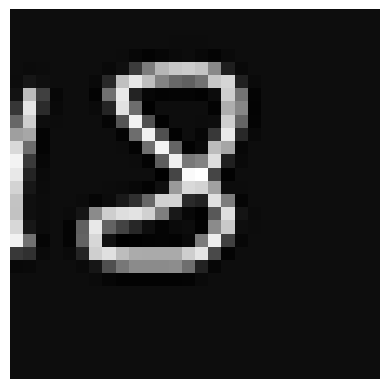

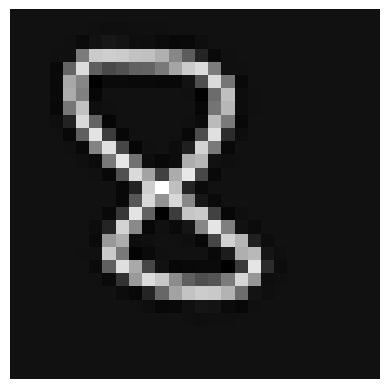

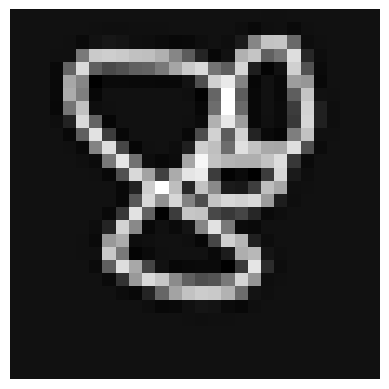

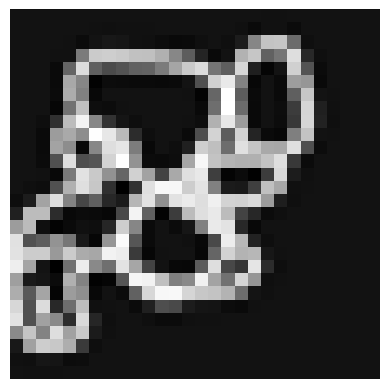

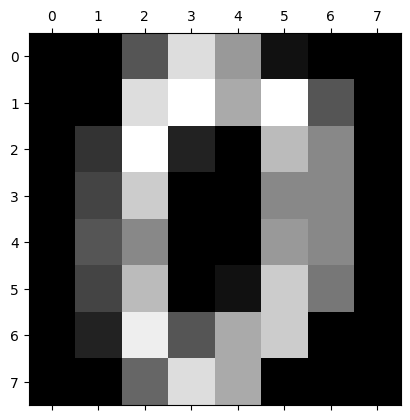

In [97]:
pl.gray()
pl.matshow(digits.images[0])
pl.show()

###Show matrix representation of the number 0

In [98]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

##Step 5: data modelling

### Supervised learning: classifying images of numbers

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

y = digits.target #A

n_samples = len(digits.images) #B
X= digits.images.reshape((n_samples, -1)) #B

print (X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #C

gnb = GaussianNB()#D
fit = gnb.fit(X_train,y_train)#E
predicted = fit.predict(X_test)#F
confusion_matrix(y_test, predicted)#G

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

In [100]:
#A Step 1: Select target variable
#B Step 2: Prepare data. Reshape adapts the matrix form. This method could for instance turn a 10x10 matrix into 100 vectors.
#C Step 3: Split into a test set and training set
#D Step 4: Select a Naïve Bayes classified; use a Gaussian distribution to estimate the probability
#E Step 5: Fit the data
#F Step 6: Predict the data for unseen data
#G Step 7: Create the confusion matrix

##Step 6: Presentation & automation

###Visually showing the predictions

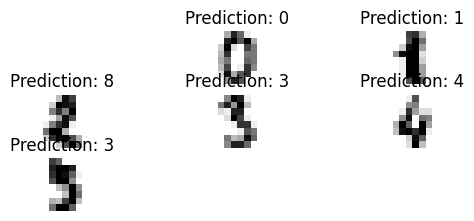

In [101]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))#A
for index, (image, prediction) in enumerate(images_and_predictions[:6]):#B
    plt.subplot(6, 3 ,index + 5)#C
    plt.axis('off')#D
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')#E
    plt.title('Prediction: %i' % prediction)#f
plt.show()#G

In [102]:
images_and_predictions

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

In [94]:
#A store the number image matrix and its prediction (as a number) together in an array
#B loop through the first 7 images
#C add an extra subplot on a 6 by 3 plot grid. This code could be simplified as:
#plt.subplot(3, 2 ,index) but this looks visually more appealing.
#D don't show an axis
#E show the image in grayscale
#F show the predicted value as the title to the shown image
#G show the full plot that is now populated with 6 subplots

In [64]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.1/468.1 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1


In [115]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to process the drawing and return matrix
def process_drawing(image):
    if image is None:
        return "Draw something first!"

    print(image)
    # Convert PIL image to NumPy array
    image_array = np.array(image["composite"])  # Convert the image to NumPy array
    if image_array.shape[-1] == 4:  # RGB image
        image_array = np.mean(image_array, axis=-1)
    # Resize to 28x28 (optional, for ML applications)
    image_resized = Image.fromarray(image_array).resize((8, 8))
    image_matrix = np.array(image_resized) / 255.0  # Normalize to [0, 1]

    print(image_matrix)
    prediction = fit.predict(image_matrix.reshape((1, -1)))

    # Display the processed image
    fig, ax = plt.subplots()
    fig.suptitle(f'Predicted digit is {prediction}')
    ax.imshow(image_matrix, cmap="gray")
    ax.axis("off")  # Hide axis

    return fig

# Create Gradio interface with `gr.Image()`
iface = gr.Interface(
    fn=process_drawing,
    inputs=gr.ImageEditor(
        type= 'pil'
      ),
    outputs=gr.Plot()
)

# Launch Gradio UI
iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2d46ed08c1aa7ef27b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


{'background': <PIL.Image.Image image mode=RGBA size=800x800 at 0x7EDD09E38150>, 'layers': [<PIL.Image.Image image mode=RGBA size=800x800 at 0x7EDD07F63E50>], 'composite': <PIL.Image.Image image mode=RGBA size=800x800 at 0x7EDD1F713D50>}
[[-2.1718068e-03  6.8039238e-02  8.8747740e-02  8.8995680e-02
   5.2098613e-02 -3.0061537e-03 -8.2771730e-05  0.0000000e+00]
 [ 3.8625877e-02  6.6905856e-02 -1.1941089e-02  8.7048067e-04
   6.6732056e-02  4.5005273e-02 -4.3518222e-03  1.4627309e-09]
 [ 1.7280729e-02  8.4782876e-02  3.8226478e-02 -3.1516668e-03
   1.6464403e-02  7.9021446e-02 -5.9350547e-03 -1.3656346e-08]
 [-3.0798519e-03  9.2766937e-03  5.5543624e-02  1.0378864e-01
   1.4127855e-01  5.0115153e-02 -5.2379123e-03  2.8915622e-06]
 [ 1.4486167e-04 -4.7324398e-03  2.6102893e-02  7.7917039e-02
   4.1376989e-02  7.2766513e-02 -3.4864224e-03 -2.8841474e-05]
 [ 0.0000000e+00 -3.7623788e-03  3.4130435e-02  8.4877521e-02
   7.0278704e-02  6.9502056e-02 -3.3733002e-03 -3.0654151e-05]
 [ 0.0000000

Support for third party widgets will remain active for the duration of the session. To disable support:

#Wine Quality Case Study

##Imports

In [30]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

##Step 2: retrieving data

###Data is drawn from an online machine learning data set archive

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)



In [ ]:
#A Download location of wine-quality dataset
#B read in the csv data , it is separated by semi-colon

##Step 3: data cleansing

###Split dataset in independent (X) and dependent (y) variables

In [42]:
X = abalone.data.features.drop('Sex', axis=1)
y = abalone.data.targets

In [ ]:
#C X is a matrix of predictor variables. These variables are wine properties like density, alcohol presence etc.
#D y is a vector and represents the dependent variable (target variable). y is the perceived wine quality.

In [56]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


from matplotlib import pyplot as plt
y['Rings'].plot(kind='hist', bins=20, title='Rings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
y['Rings'].plot(kind='line', figsize=(8, 4), title='Rings')
plt.gca().spines[['top', 'right']].set_visible(False)

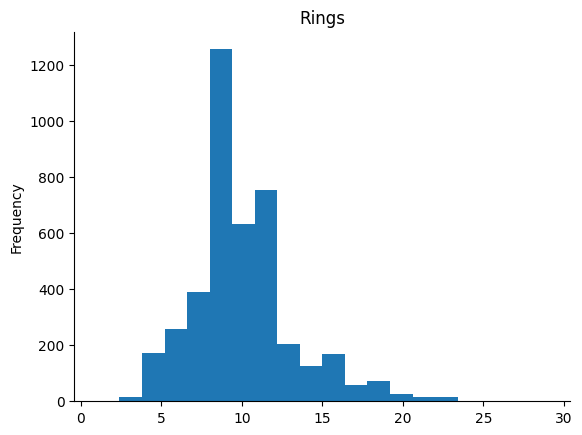

In [58]:
from matplotlib import pyplot as plt
y['Rings'].plot(kind='hist', bins=20, title='Rings')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


###Variable standardisation

In [44]:
pX = preprocessing.StandardScaler().fit(X).transform(X) #E

In [ ]:
#E When standardizing data, the following formula is applied to every datapoint:
# z = (x-μ)/σ
# z is the new obsevation value , x the old one. μ is the mean and σ the standard deviation.
# PCA of a data matrix is easier to interpret when the columns have first been centered by their means.

##Step 4: data exploration

###principal component analysis (PCA) for dimentionality reduction

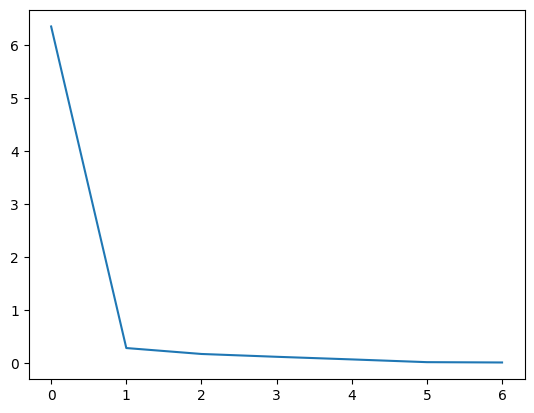

In [45]:
model = PCA() #A
results = model.fit(pX) #B
Z = results.transform(pX) #C
plt.plot(results.explained_variance_) #D
plt.show() #E

In [ ]:
#A create an instance of principal component analysis class
#B apply PCA on the predictor variables to see if they can be compacted into less variables
#C turn the result into an actual array so we can use the newly created data
#D plot the explained variance in variables, this plot is called a scree plot
#E show the plot

In [46]:
print(results.components_)

[[ 3.83250818e-01  3.83573189e-01  3.48143831e-01  3.90673460e-01
   3.78188288e-01  3.81513407e-01  3.78921731e-01]
 [ 3.78652906e-02  6.53232412e-02  8.66836026e-01 -2.33271169e-01
  -3.48010694e-01 -2.52902946e-01 -5.83747843e-02]
 [ 5.93279947e-01  5.85366078e-01 -3.14876363e-01 -2.30825219e-01
  -2.31567768e-01 -2.70252667e-01 -1.62104650e-01]
 [-8.93316727e-02 -8.28581396e-03 -1.65564868e-01  5.22801642e-02
  -4.96179039e-01 -1.40972073e-01  8.34110000e-01]
 [ 4.05126002e-02  8.51762772e-03 -2.71104239e-02 -1.10183954e-01
  -5.45339050e-01  8.09328460e-01 -1.81668556e-01]
 [-6.99651086e-01  7.11025627e-01 -9.84128310e-03  2.16532984e-02
   1.10305160e-02  2.39960631e-02 -6.05616752e-02]
 [ 2.38929537e-02 -1.58868202e-02 -7.07791518e-04  8.51079281e-01
  -3.72194242e-01 -2.04913695e-01 -3.07119058e-01]]


##step 3 revisited: data preparation

###Using the PCA analysis we will compress the data to just a few principal components

In [47]:
pd.DataFrame(results.components_, columns=X.columns)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.383251,0.383573,0.348144,0.390673,0.378188,0.381513,0.378922
1,0.037865,0.065323,0.866836,-0.233271,-0.348011,-0.252903,-0.058375
2,0.593280,0.585366,-0.314876,-0.230825,-0.231568,-0.270253,-0.162105
3,-0.089332,-0.008286,-0.165565,0.052280,-0.496179,-0.140972,0.834110
4,0.040513,0.008518,-0.027110,-0.110184,-0.545339,0.809328,-0.181669
5,-0.699651,0.711026,-0.009841,0.021653,0.011031,0.023996,-0.060562
6,0.023893,-0.015887,-0.000708,0.851079,-0.372194,-0.204914,-0.307119


In [ ]:
#The table shows how each original variable loads to the newly created factors.

In [48]:
pX

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

##Step 5: data modelling

###Wine score prediction without  principal components analysis

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

gnb = GaussianNB() #A
fit = gnb.fit(pX,y) #B
pred = fit.predict(pX) #C
print (confusion_matrix(pred,y))#D

[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0  13  24  11   3   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   2  25  32  16   6   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   7  54  79  57  19  11   7   4   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  15  91 111  59  36  28  10   7   2   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3  53 138 150  94  51  32  20  18   6   6   5   2   3
    1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10  50 142 115  71  52  42  26  21  19   5   4   3
    2   2   2   1   2   0   0   0   0   0]
 [  0   0   0   0   0   5  22 135 209 160  93  48  52  32  23  1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print (confusion_matrix(pred,y).trace())#E

1027


In [ ]:
#A Use a Gaussian distribution Naïve Bayes classifier for estimation
#B Fit the data
#C Predict the data for unseen data
#D Study the confusion matrix
#E count of all correctly classified cases: all counts on the trace or diagonal summed up

###Wine score prediction with increasing number of Principal components

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[1127]
[1127, 1046]
[1127, 1046, 1049]
[1127, 1046, 1049, 1074]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1127, 1046, 1049, 1074, 1043]
[1127, 1046, 1049, 1074, 1043, 1024]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1127, 1046, 1049, 1074, 1043, 1024, 998]


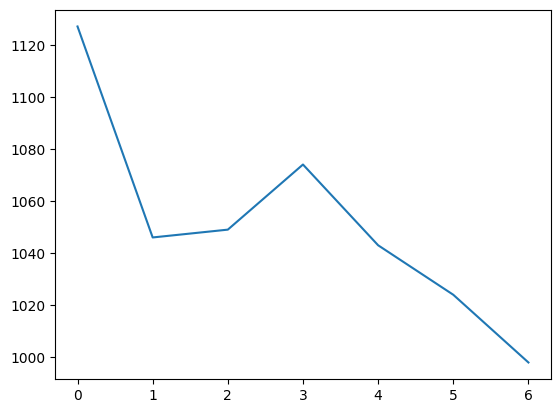

In [57]:
predicted_correct = []#A
for i in range(1,8):#B
    model = PCA(n_components = i)#C
    results = model.fit(pX)#D
    Z = results.transform(pX) #E
    fit = gnb.fit(Z,y) #F
    pred = fit.predict(Z)#G
    predicted_correct.append(confusion_matrix(pred,y).trace())#H
    print (predicted_correct) #I
plt.plot(predicted_correct) #J
plt.show()#K

In [ ]:
#A array will be filled with correctly predicted observations
#B loop through the first 10 detected principal components
#C istantiate a PCA model with 1 component (first iteration) up to 10 components (in 10th iteration)
#D fit the PCA model on the x-variables (features)
#E Z is the result in matrix form (actually an array filled with arrays)
#F Use a Gaussian distribution Naïve Bayes classifier for estimation.
#G the actual prediction itself using the fitted model
#H at the end of each iteration we append the number of correctly classified observations
#I printing this array we can see how after each iteration the new count of correctly classified observations is appended
#J It's easier to see when plot the array
#K The plot is shown

#Iris classification example

In [5]:
!pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

In [16]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,cluster,target,c
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0,None,lookatmeIamimportant
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0,None,lookatmeIamimportant
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0,None,lookatmeIamimportant
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0,None,lookatmeIamimportant
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0,None,lookatmeIamimportant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6,None,lookatmeIamimportant
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6,None,lookatmeIamimportant
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6,None,lookatmeIamimportant
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6,None,lookatmeIamimportant


In [17]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [25]:
import sklearn as sklearn
from sklearn import cluster
import pandas as pd

  #A
 #B
print (X[:5]) #C
model   = cluster.KMeans(n_clusters=7, random_state=25)  #D
results = model.fit(X) #E
X["cluster"] = results.predict(X) #F
X["target"] = y #G
X["c"] = "lookatmeIamimportant" #H
print (X[:5]) #I
classification_result = X[["cluster", "target","c"]].groupby(["cluster","target"]).agg("count")  #J
print(classification_result)#K

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147 

In [ ]:
#A load in the iris (flowers) data of scikit learn
#B transform the iris data into a pandas dataframe
#C print the first 5 observations of the dataframe to the screen, now we can clearly see the 4 variables: sepal length, sepal width, petal length and petal width
#D initialise a kmeans cluster model with 3 clusters. the random_state is just a random seed, if you don't put it, the seed will also be random.
# we opt for 3 clusters because we saw in the last listing this might be a good compromise between complexity and performance
#E fit the model to the data. All variables are considered independent variables, there is no target variable (y) in unsupervised learninh
#F add another variable called "cluster" to the dataframe. This indicates the cluster membership of every flower in the dataset
#G let's finally add a target variable (y) to the dataframe
#H adding a variable "c" is just a little trick we use to do a count later. the value here is really arbitrary since we just need a column to count the rows
#I there are 3 parts to this code, first we select the "cluster", "target" and "c" column. Then we group by the "cluster" and "target" column. Finally we aggregate the row of the group by with a simple count aggregation
#K the matrix this classification result represents gives us an indication of whether our clustering was successful. For cluster 0, we are spot on, on clusters 1 and 2 there has been a slight mixup but in total we only get 16 (14+2) misclassifications out of 150.